In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler

# voor k-means
from sklearn.cluster import KMeans

# voor het bepalen van een afstandsmatrix
from scipy.spatial.distance import pdist

# voor hiërarchisch clusteren
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster



In [7]:
df = pd.read_csv(r"C:\Users\lucas\OneDrive\Jaar 5\Stat5\college_math.csv")
useless_var = ["age", "gender"]
num_var = [
    "commute_minutes",
    "grade_final",
    "grade_period1",
    "grade_period2",
    "past_failure",
    "school_absences",
    "weekly_study_hours"
]
bin_var = [
    "extra_paid_classes",
    "internet_access",
    "support_family",
    "support_school"
]
ord_var = [
    "alcohol_weekday",
    "alcohol_weekend",
    "free_time",
    "health_status",
    "social_outings"
]

In [8]:
df3 = df.drop(columns=useless_var)
df2 = df3.drop(columns=bin_var)
df1 = df2.drop(columns=ord_var)

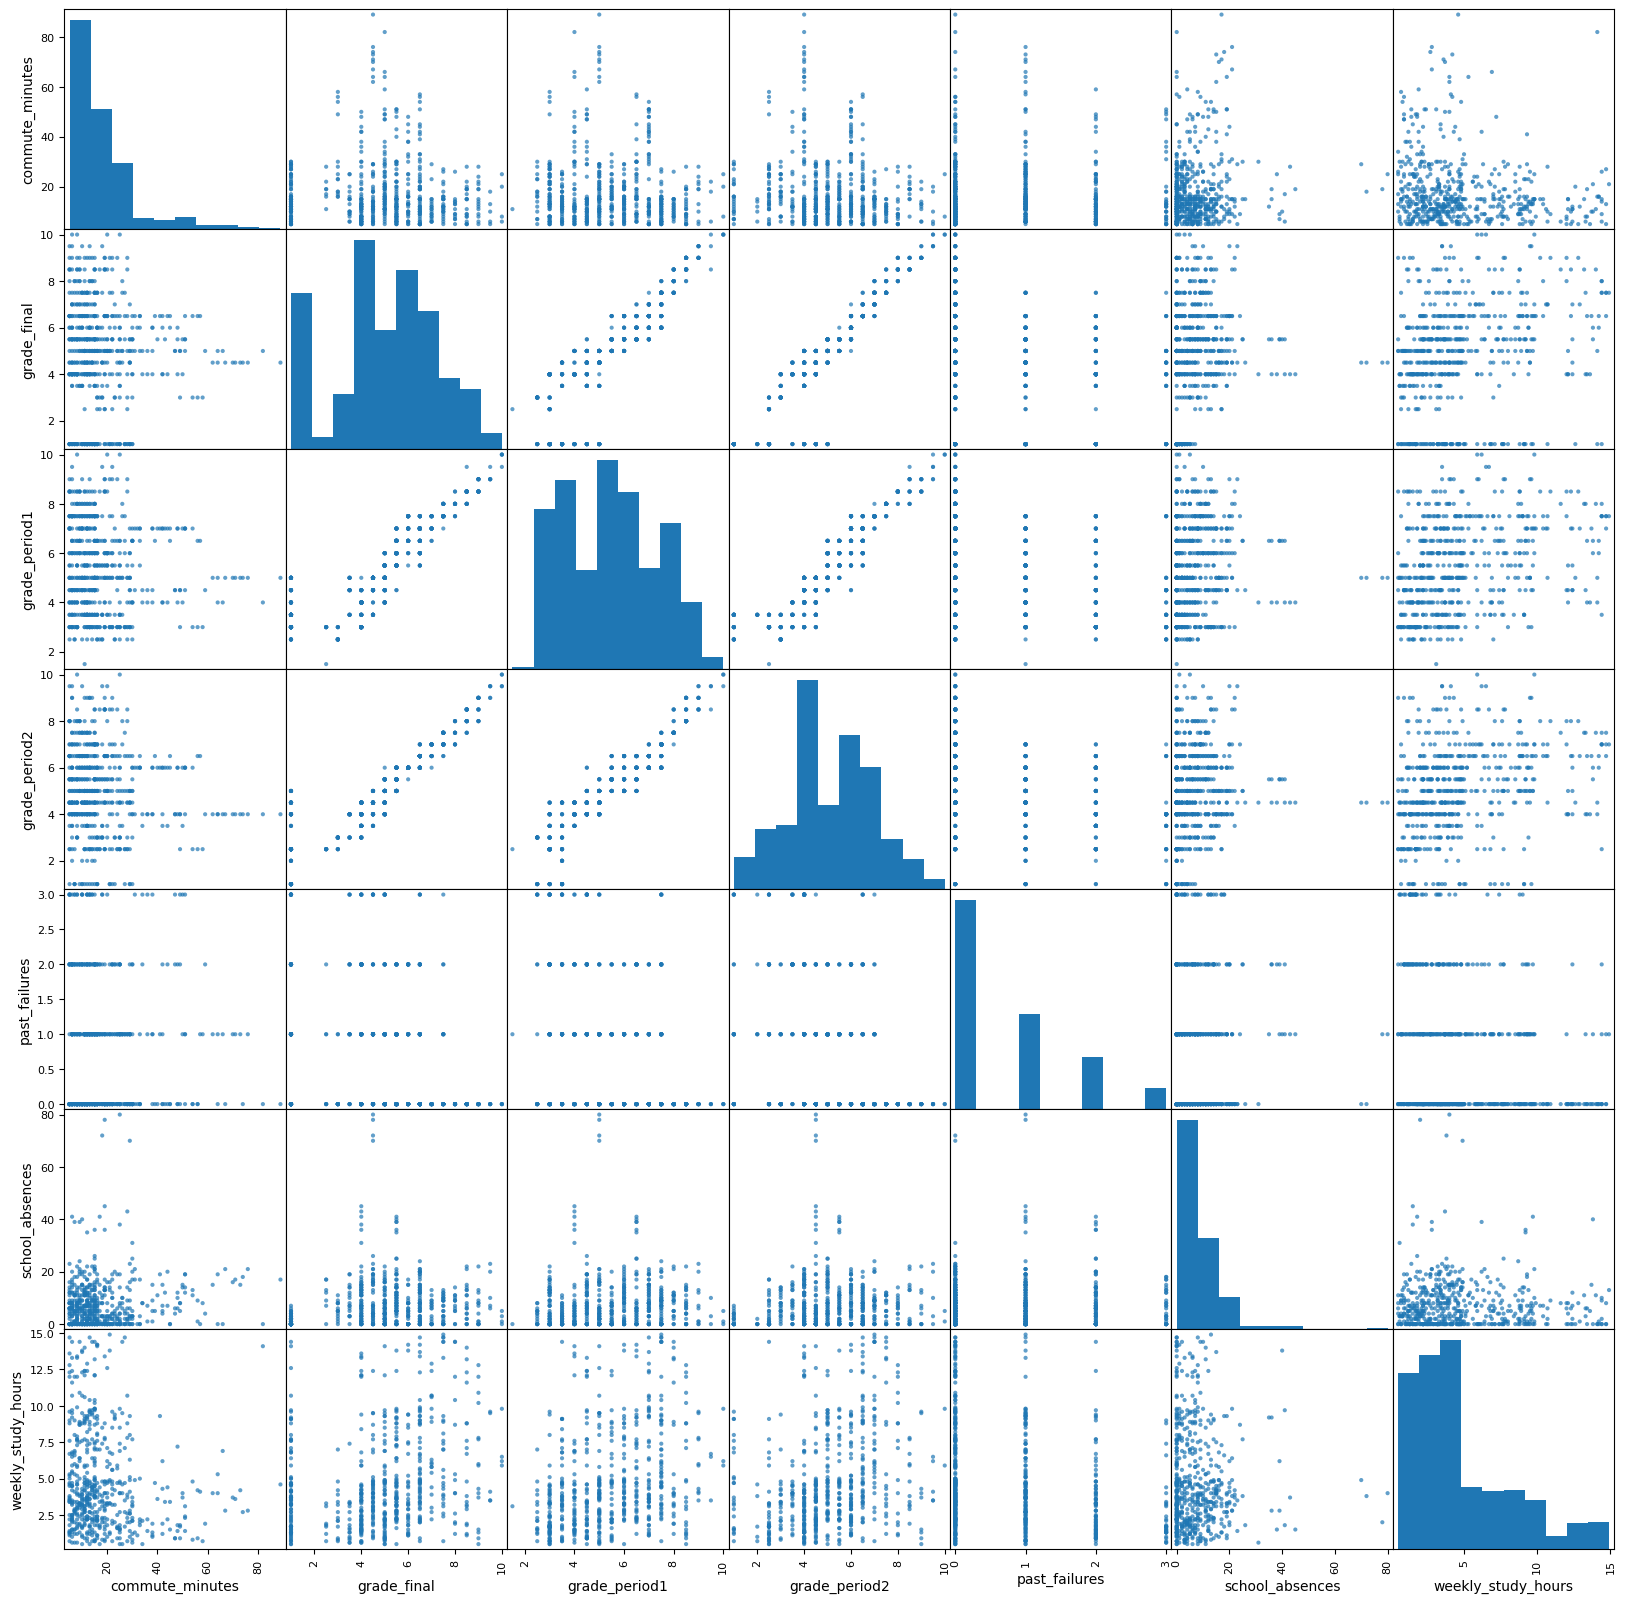

In [9]:
scatter_matrix(df1, figsize=(20, 20), diagonal="hist", alpha=0.7)
plt.show()


c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

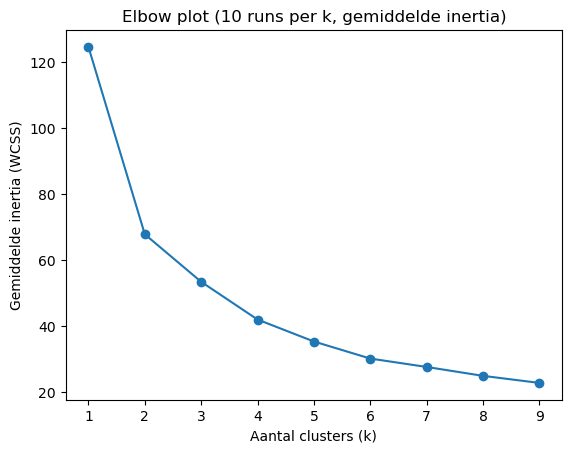

In [11]:
#Alleen nummerieke data, k-means en data doen schalen

df1 = df1.drop(columns=['commute_minutes','past_failures'])
scaler = MinMaxScaler()
df1_1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

inertias = []
K_range = range(1, 10)
n_runs = 10  # aantal herhalingen per k

for k in K_range:
    run_inertias = []
    for _ in range(n_runs):
        model = KMeans(n_clusters=k, n_init='auto')
        model.fit(df1_1)
        run_inertias.append(model.inertia_)
    inertias.append(np.mean(run_inertias))  # gemiddelde inertia per k

# Elbow plot
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Aantal clusters (k)')
plt.ylabel('Gemiddelde inertia (WCSS)')
plt.title(f'Elbow plot ({n_runs} runs per k, gemiddelde inertia)')
plt.show()

In [12]:
# voer k-means uit met k=2
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(df1_1)

labels = kmeans.labels_
df1_1['cluster'] = labels+1

c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


c:\Users\lucas\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


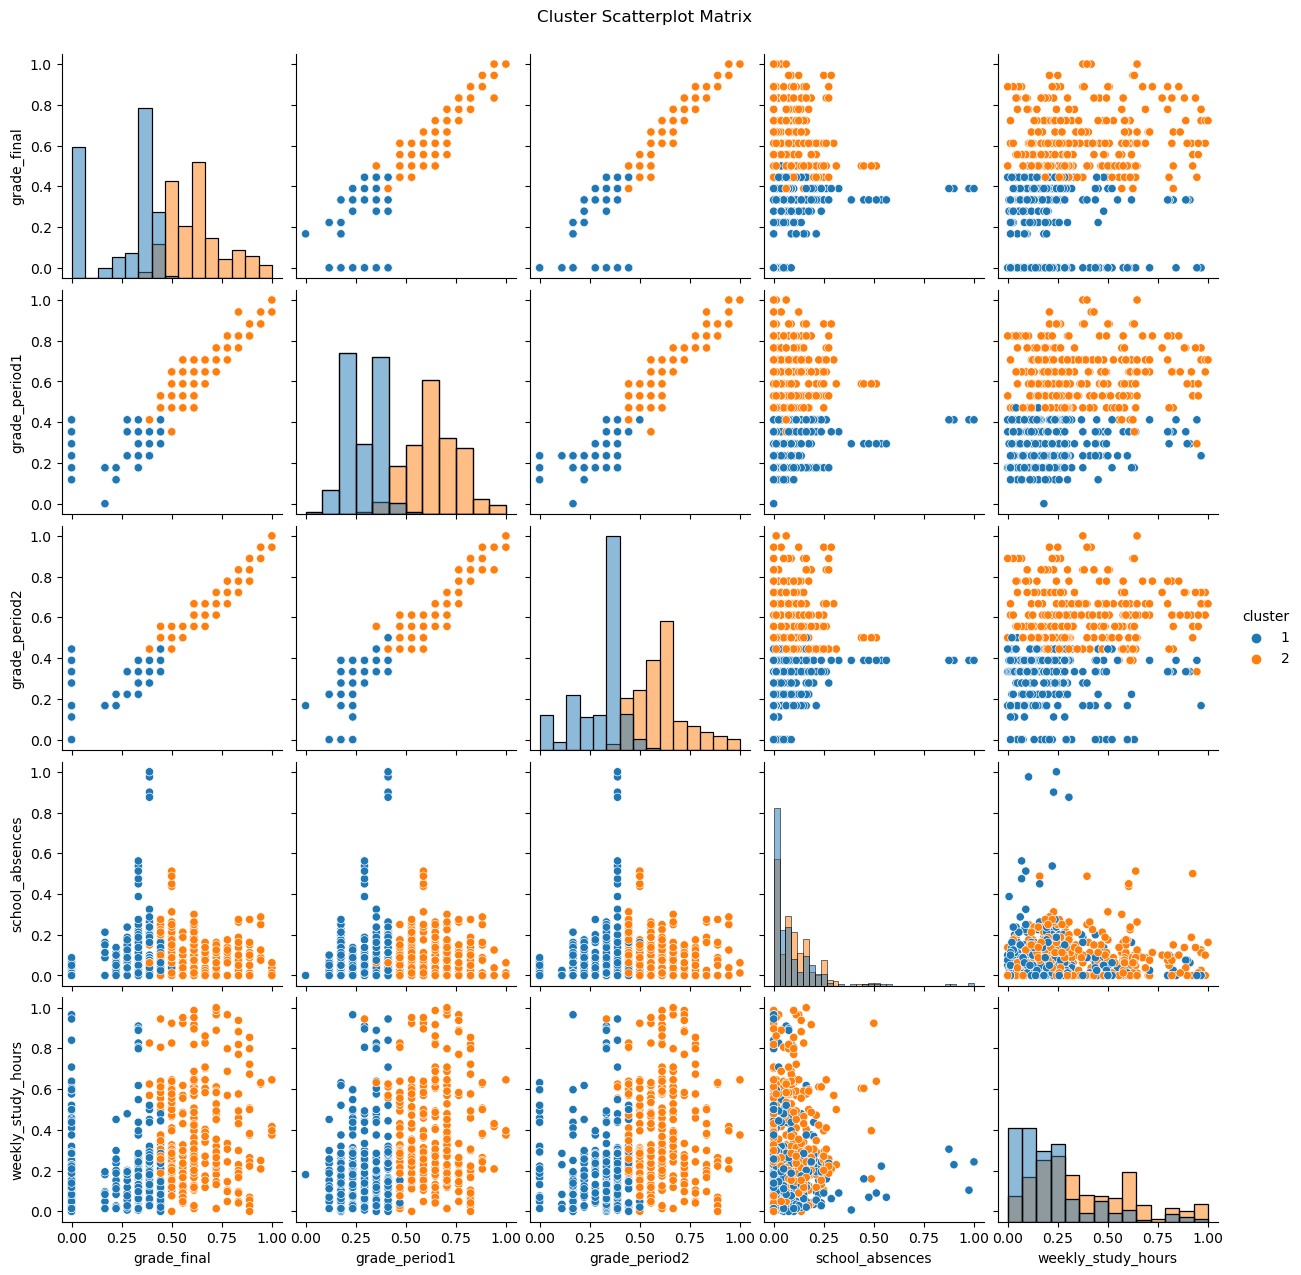

In [13]:
sns.pairplot(df1_1, vars=df1_1.columns.drop("cluster"), hue="cluster", palette="tab10", diag_kind="hist")
plt.suptitle("Cluster Scatterplot Matrix", y=1.02)
plt.show()

In [14]:
combinations = [
    ("single", "cityblock"),
    ("single", "euclidean"),
    ("single", "chebyshev"),
    ("average", "cityblock"),
    ("average", "euclidean"),
    ("average", "chebyshev"),
    ("centroid", "euclidean"),
    ("ward", "euclidean")
]
df1_2 = df1
df1_2 = df1_2.drop(columns=['commute_minutes','past_failures','school_absences'])
scaler = MinMaxScaler()
df1_2 = pd.DataFrame(scaler.fit_transform(df1_2), columns=df1_2.columns)


KeyError: "['commute_minutes', 'past_failures'] not found in axis"

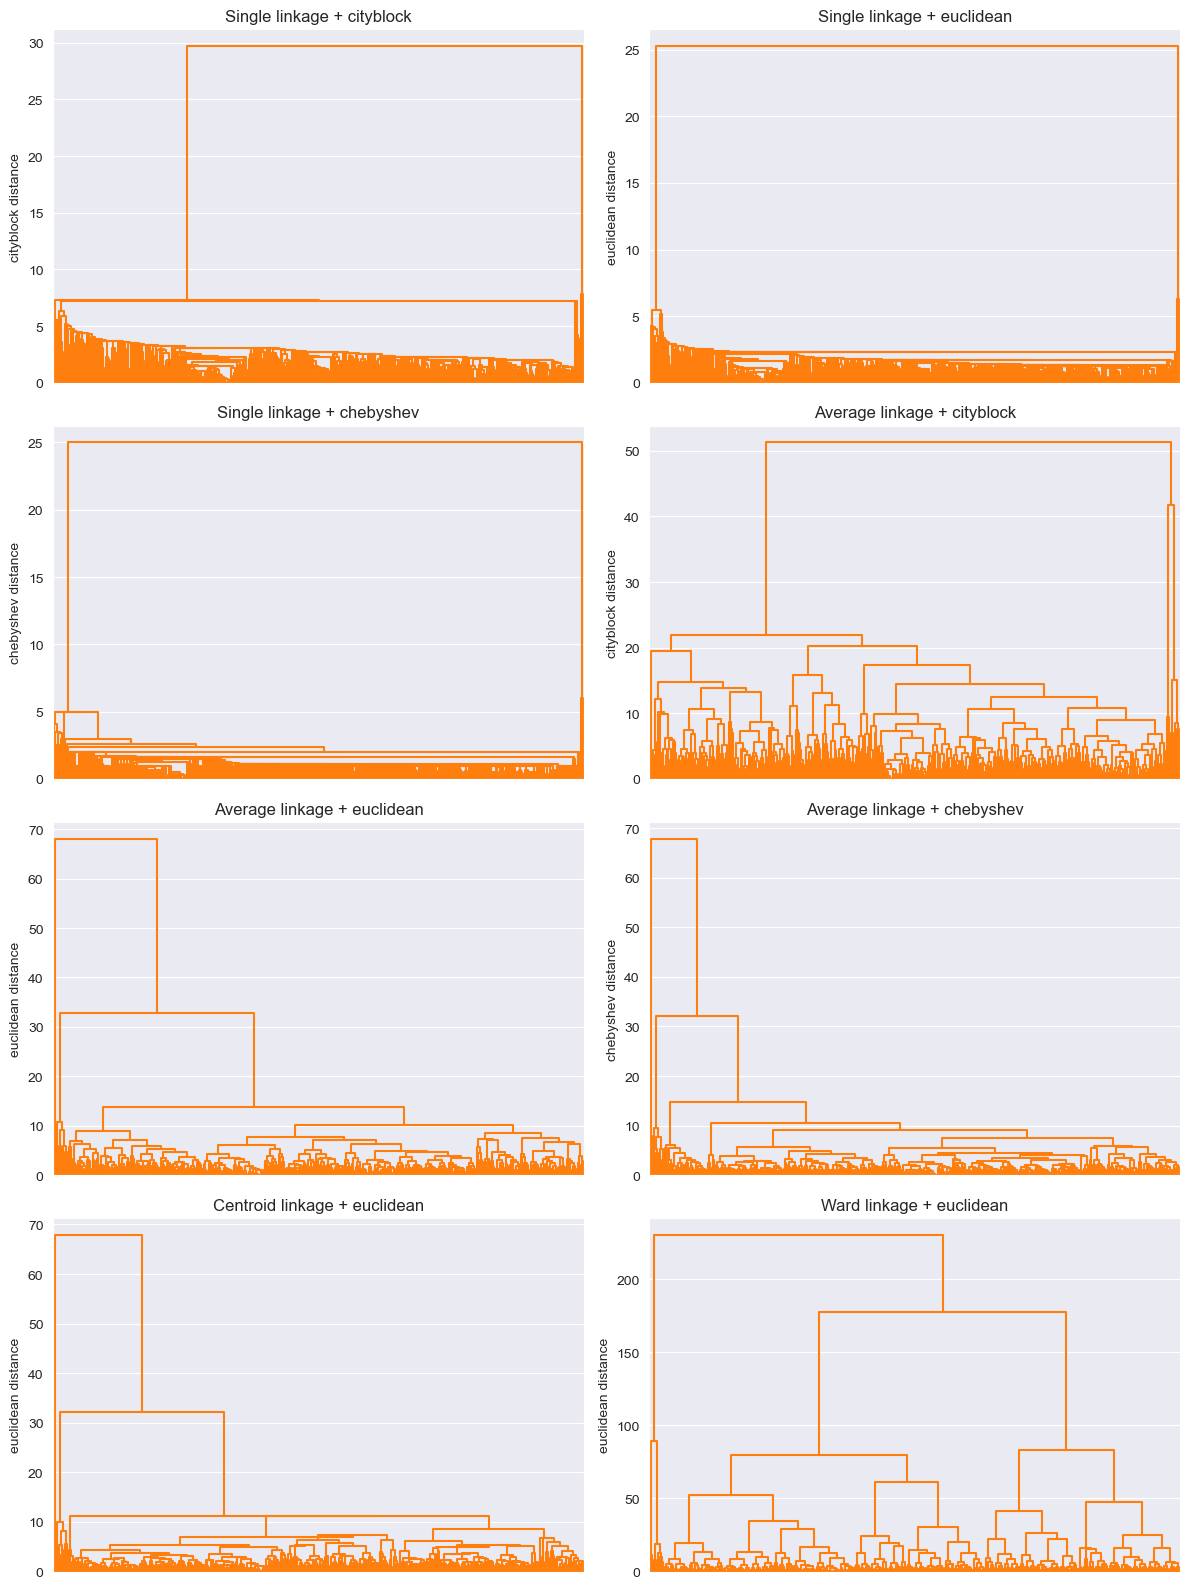

In [15]:
X = df1_2.values  
sns.set_style("darkgrid")

# maak subplot grid (aantal rijen en kolommen automatisch)
n = len(combinations)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
n_clusters = 2

for ax, (method, metric) in zip(axes.ravel(), combinations):
    dist_matrix = pdist(X, metric=metric)
    hc = linkage(dist_matrix, method=method)
    
    # labels per datapunt (3 clusters)
    cluster_labels = fcluster(hc, t=n_clusters, criterion="maxclust")
    
    # cutoff afstand vinden voor 3 clusters
    # dat is de hoogte van de (n_clusters)-de grootste verbinding
    cutoff = hc[-(n_clusters-1), 3]
    
    dendrogram(
        hc, ax=ax, no_labels=True, color_threshold=cutoff
    )
    ax.set_title(f"{method.capitalize()} linkage + {metric}")
    ax.set_ylabel(f"{metric} distance")

# lege subplots (als grid groter is dan aantal plots)
for ax in axes.ravel()[len(combinations):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

c:\Users\lucas\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


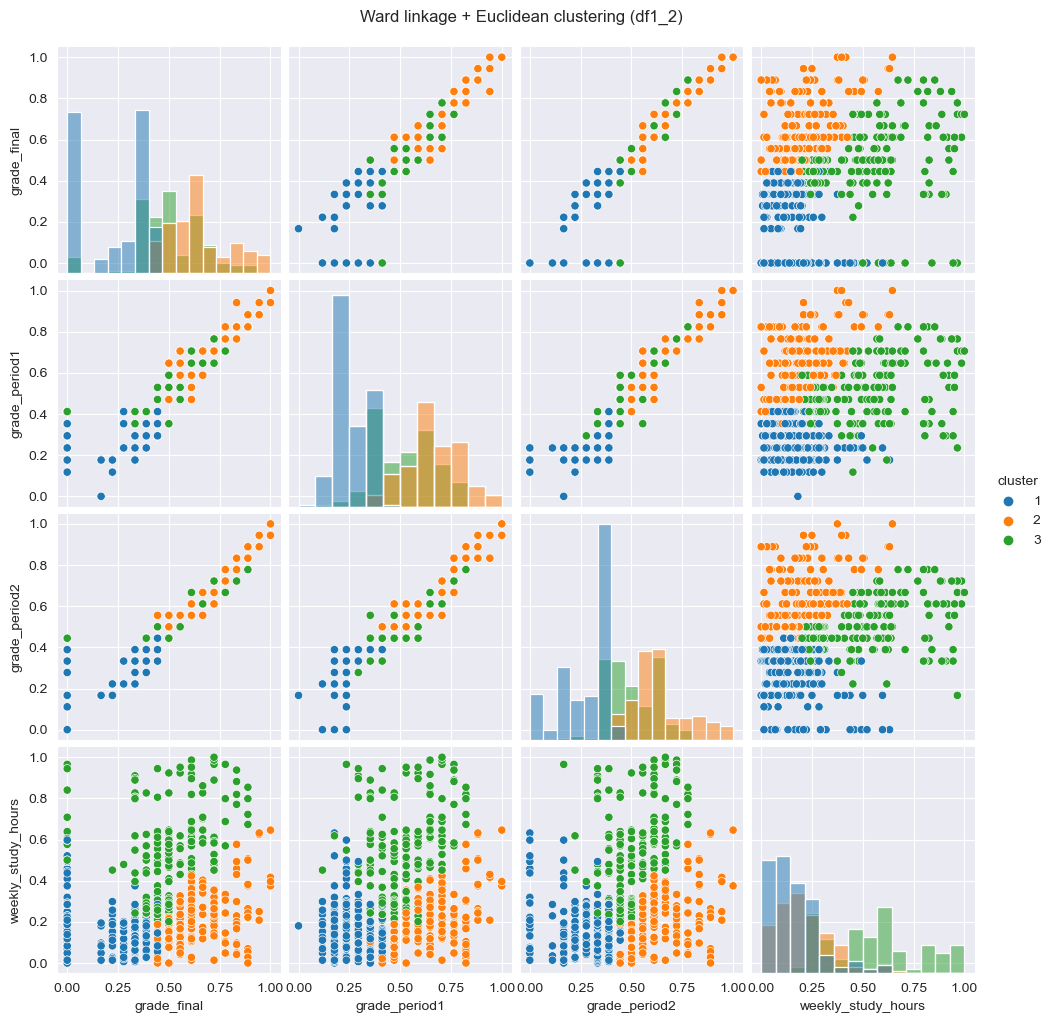

In [ ]:
dist_matrix = pdist(X, metric="euclidean")
hc = linkage(dist_matrix, method="ward")

# clusterlabels (bijvoorbeeld 3 clusters)
df1_2['cluster'] = fcluster(hc, t=3, criterion='maxclust')

# pairplot
sns.pairplot(df1_2, 
             vars=df1_2.columns.drop("cluster"), 
             hue="cluster", 
             palette="tab10", 
             diag_kind="hist")
plt.suptitle("Ward linkage + Euclidean clustering (df1_2)", y=1.02)
plt.show()


In [16]:
df2_1 = df2

c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

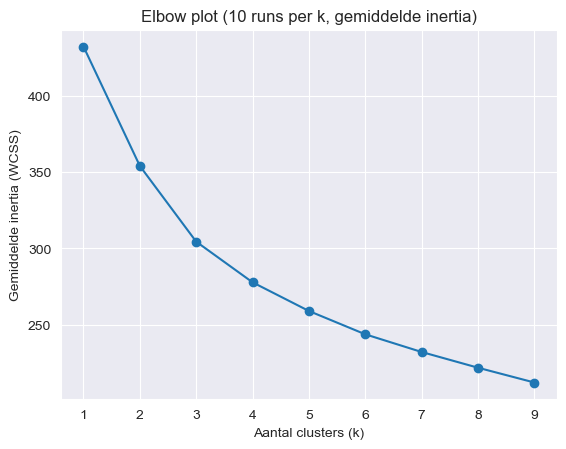

In [17]:
scaler = MinMaxScaler()
df2_1 = pd.DataFrame(scaler.fit_transform(df2_1), columns=df2_1.columns)

inertias = []
K_range = range(1, 10)
n_runs = 10  # aantal herhalingen per k

for k in K_range:
    run_inertias = []
    for _ in range(n_runs):
        model = KMeans(n_clusters=k, n_init='auto')
        model.fit(df2_1)
        run_inertias.append(model.inertia_)
    inertias.append(np.mean(run_inertias))  # gemiddelde inertia per k

# Elbow plot
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Aantal clusters (k)')
plt.ylabel('Gemiddelde inertia (WCSS)')
plt.title(f'Elbow plot ({n_runs} runs per k, gemiddelde inertia)')
plt.show()

In [18]:
# voer k-means uit met k=3
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df2_1)

labels = kmeans.labels_
df2_1['cluster'] = labels+1

c:\Users\lucas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


c:\Users\lucas\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


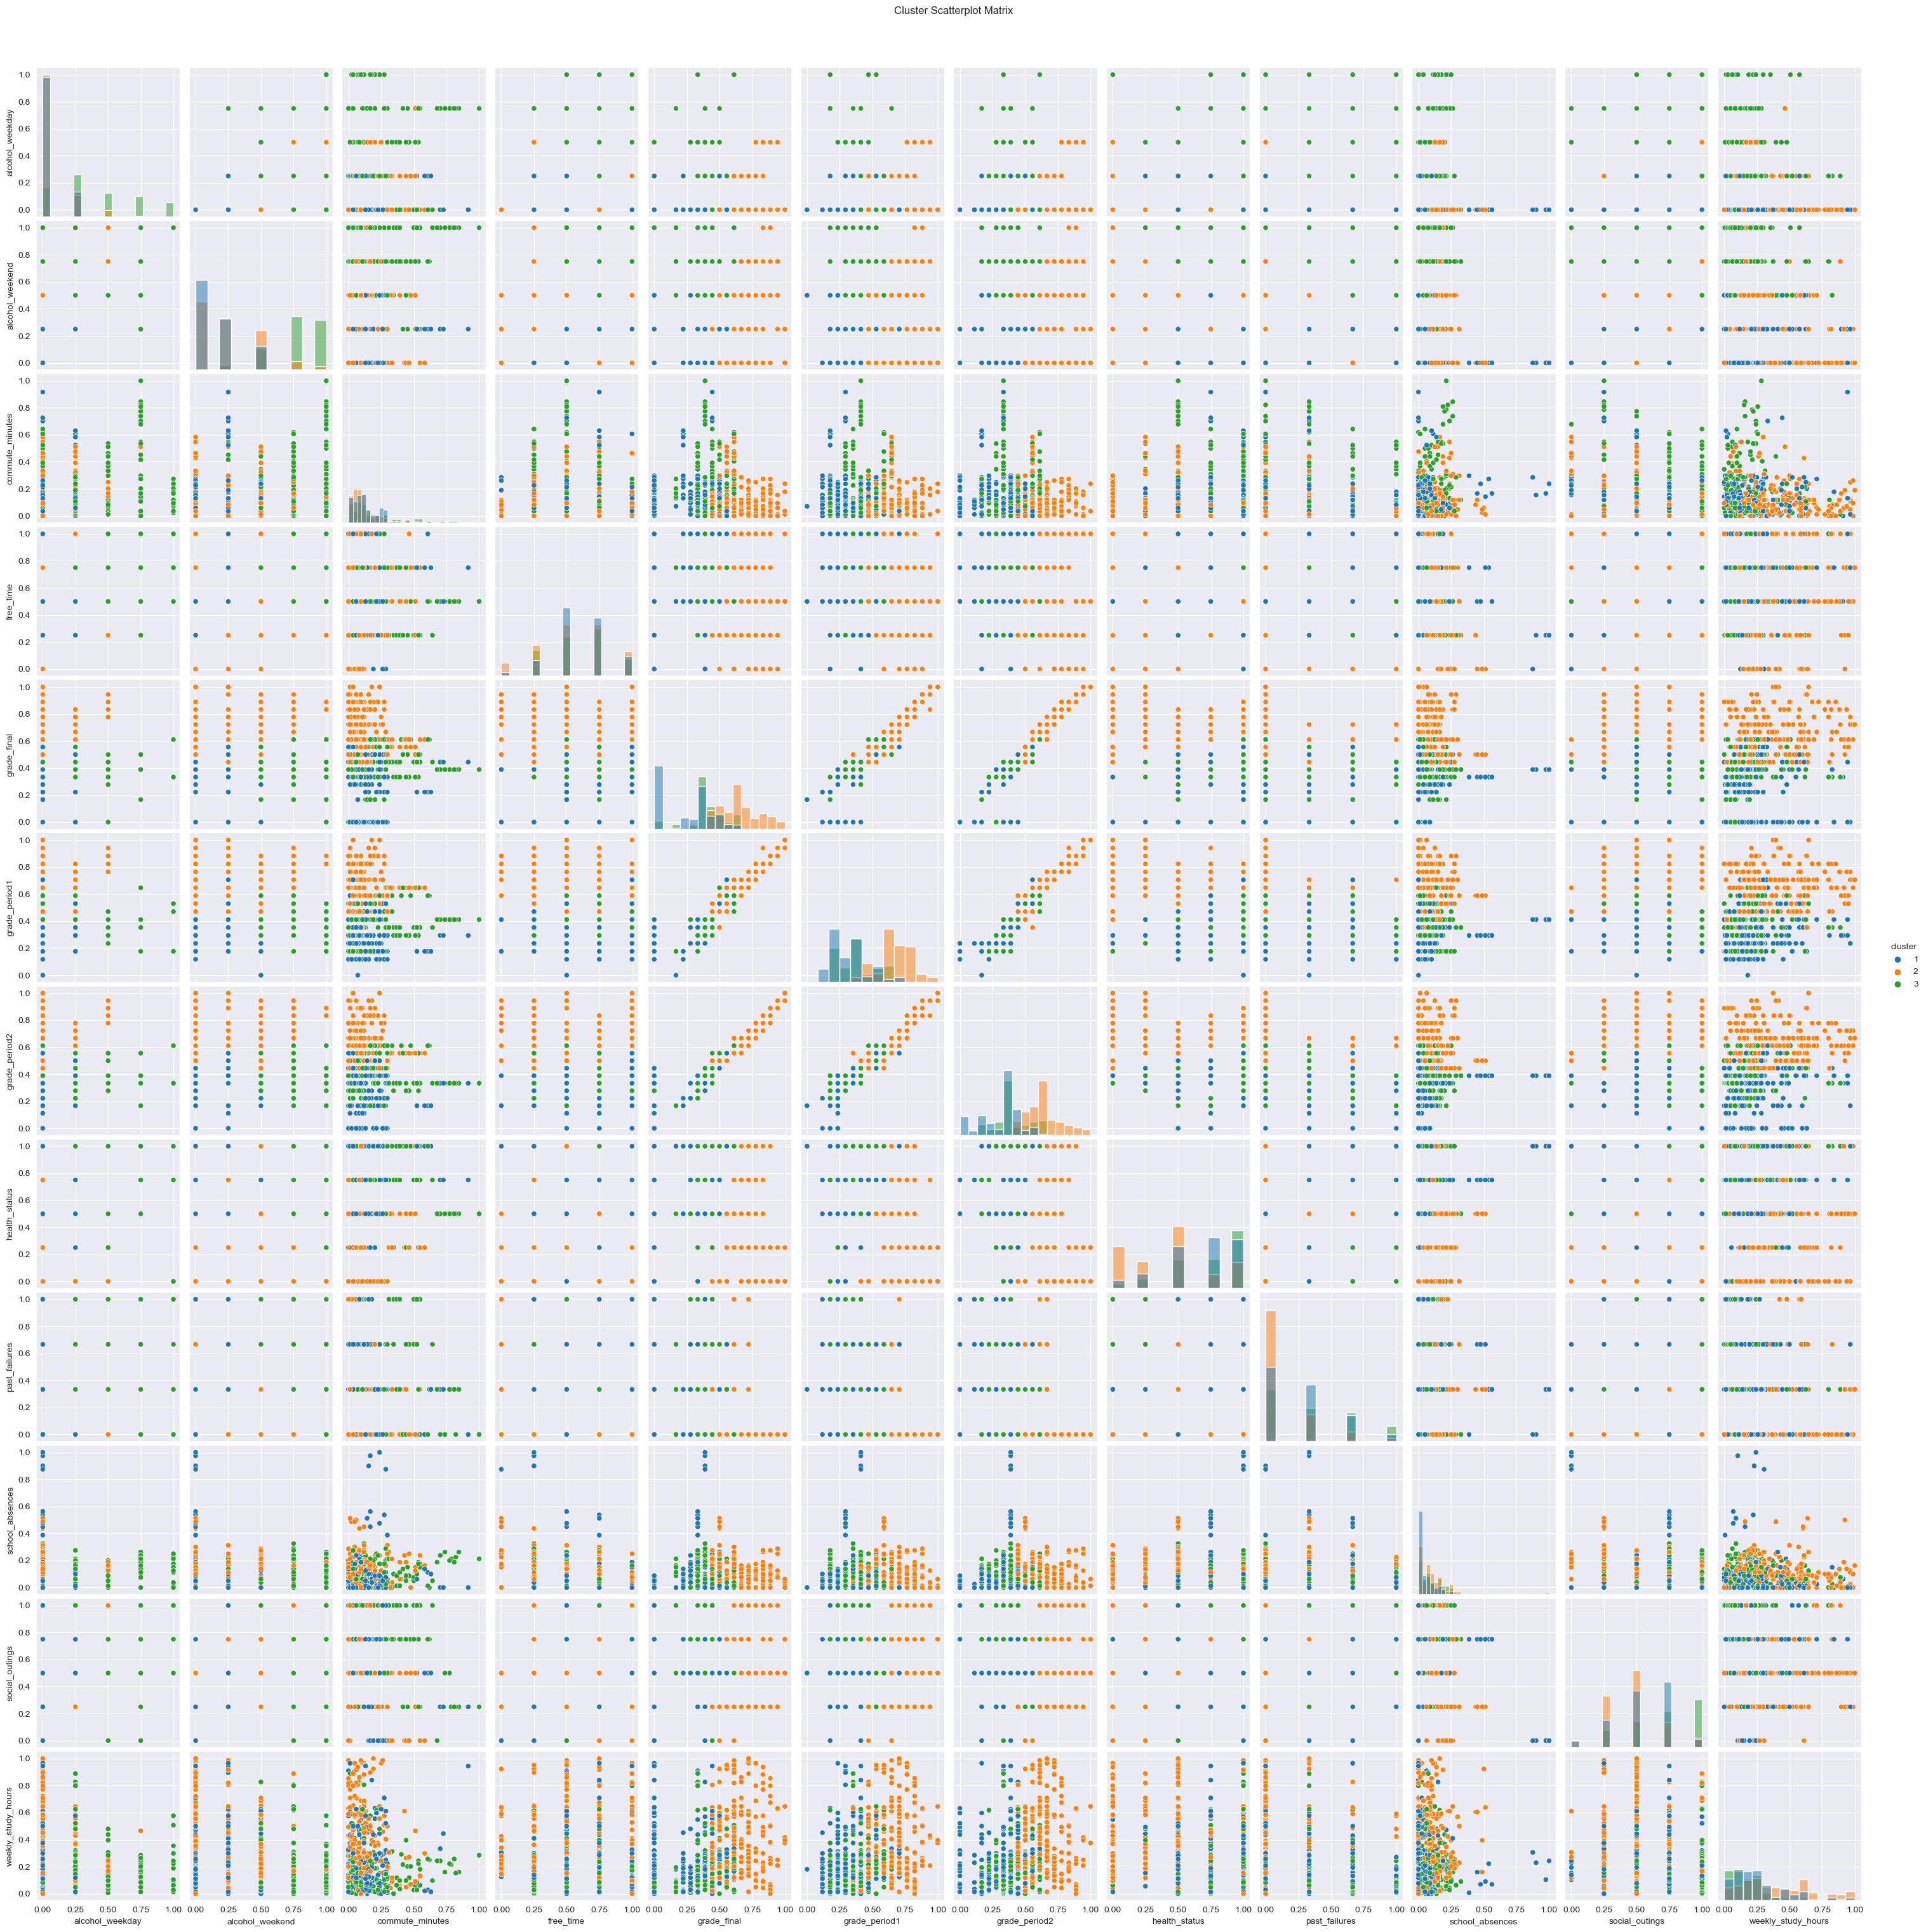

In [19]:
sns.pairplot(df2_1, vars=df2_1.columns.drop("cluster"), hue="cluster", palette="tab10", diag_kind="hist")
plt.suptitle("Cluster Scatterplot Matrix", y=1.02)
plt.show()

In [ ]:
df2_1

commute_minutes  grade_final  grade_period1  grade_period2  \
0           0.011905     0.888889       0.823529       0.888889   
1           0.071429     0.000000       0.352941       0.388889   
2           0.345238     0.333333       0.294118       0.277778   
3           0.011905     0.666667       0.647059       0.611111   
4           0.011905     0.611111       0.705882       0.666667   
..               ...          ...            ...            ...   
568         0.166667     0.833333       0.823529       0.833333   
569         0.226190     0.000000       0.176471       0.166667   
570         0.095238     0.666667       0.705882       0.666667   
571         0.035714     0.555556       0.705882       0.555556   
572         0.130952     0.222222       0.117647       0.222222   

     past_failures  school_absences  weekly_study_hours  cluster  
0         0.000000           0.0000            0.069444        1  
1         0.000000           0.0000            0.256944        2  
2         1.000000           0.1000            0.111111        2  
3         0.000000           0.0000            0.826389        1  
4         0.000000           0.2500            0.291667        1  
..             ...              ...                 ...      ...  
568       0.000000           0.1625            0.166667        1  
569       0.333333           0.0000            0.138889        2  
570       0.000000           0.1375            0.152778        1  
571       0.666667           0.0000            0.298611        1  
572       0.000000           0.0500            0.111111        2  

[573 rows x 8 columns]